# Predicting Price Of Renting An Apartment In Lagos State.

The objective of this project is predicting the cost of renting an apartment in lagos state based on the area, number of bed rooms and number of toilets.
Data set for this project was gathered from https://tolet.ng, also scrapper for gathered the data can be found on my github here -> https://github.com/victorlenerd/toletngscrapper.

## Loading And Cleaning Data.

In [1]:
## Loading Data
import math
import seaborn as sns
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from time import time
from pandas.tools.plotting import scatter_matrix
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

sns.set_style("whitegrid")

%matplotlib inline

In [2]:
df = pd.read_json('./data.all.json')
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15075 entries, 0 to 17213
Data columns (total 8 columns):
address              15075 non-null object
lat                  15074 non-null float64
lng                  15074 non-null float64
no_bath              15073 non-null object
no_bed               15075 non-null object
no_parking_spaces    6180 non-null float64
no_toilets           15074 non-null object
price                14933 non-null float64
dtypes: float64(4), object(4)
memory usage: 1.0+ MB


In [3]:
df.describe()

,lat,lng,no_parking_spaces,price
count,15074.000000,15074.000000,6180.000000,1.493300e+04
mean,6.512955,348.477251,11.513916,2.837338e+06
std,0.070490,11745.075773,230.577283,5.848582e+07
min,6.409760,2.887644,0.000000,1.000000e-02
25%,6.451514,3.357300,0.000000,5.000000e+05
50%,6.503759,3.411084,2.000000,1.000000e+06
75%,6.574911,3.469745,3.000000,2.000000e+06
max,7.539378,400106.000000,12345.000000,5.000000e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15075 entries, 0 to 17213
Data columns (total 8 columns):
address              15075 non-null object
lat                  15074 non-null float64
lng                  15074 non-null float64
no_bath              15073 non-null object
no_bed               15075 non-null object
no_parking_spaces    6180 non-null float64
no_toilets           15074 non-null object
price                14933 non-null float64
dtypes: float64(4), object(4)
memory usage: 1.0+ MB


In [5]:
df.head()

,address,lat,lng,no_bath,no_bed,no_parking_spaces,no_toilets,price
0,grand mate ago palace okota lagos,6.505798,3.302019,3,3,NaN,3,750000.0
1,lake view amuwo odofin lagos,6.453094,3.291062,1,1,NaN,1,500000.0
2,edowurufi street ago palace okota lagos,6.505798,3.302019,3,2,NaN,2,450000.0
3,grand mate ago palace okota lagos,6.505798,3.302019,2,2,NaN,2,500000.0
4,green field estate amuwo odofin lagos,6.453094,3.291062,2,2,NaN,2,550000.0


In [6]:
def clean_nums(num):
    try:
        return int(num)
    except ValueError:
        return 0
    except TypeError:
        return num

df['no_bed'] = df['no_bed'].apply(clean_nums)
df['no_bath'] = df['no_bath'].apply(clean_nums)
df['no_toilets'] = df['no_toilets'].apply(clean_nums)

In [7]:
df = df.drop('address', axis=1)
df = df.drop('no_parking_spaces', axis=1)

In [8]:
df = df[df['no_bed'] > 1]
df = df[df['no_bed'] < 11]

df = df[df['no_bath'] > 1]
df = df[df['no_bath'] < 11]

df = df[df['no_toilets'] > 1]
df = df[df['no_toilets'] < 11]

In [9]:
df = df[np.isfinite(df['price'])]

In [10]:
df.head()

,lat,lng,no_bath,no_bed,no_toilets,price
0,6.505798,3.302019,3.0,3,3.0,750000.0
2,6.505798,3.302019,3.0,2,2.0,450000.0
3,6.505798,3.302019,2.0,2,2.0,500000.0
4,6.453094,3.291062,2.0,2,2.0,550000.0
5,6.505798,3.302019,3.0,3,3.0,800000.0


In [11]:
df = df.dropna()
df = df.drop_duplicates()

In [12]:
df.describe()

,lat,lng,no_bath,no_bed,no_toilets,price
count,5629.000000,5629.000000,5629.000000,5629.000000,5629.000000,5.629000e+03
mean,6.523604,643.120146,2.778824,2.743116,3.229526,3.139561e+06
std,0.070303,15987.041618,0.774004,0.663623,0.877688,6.677850e+07
min,6.409760,2.887644,2.000000,2.000000,2.000000,1.000000e+00
25%,6.454811,3.348967,2.000000,2.000000,3.000000,6.000000e+05
50%,6.506384,3.383875,3.000000,3.000000,3.000000,1.000000e+06
75%,6.589765,3.469745,3.000000,3.000000,4.000000,1.800000e+06
max,6.718915,400106.000000,10.000000,10.000000,10.000000,5.000000e+09


### Visualizing Data

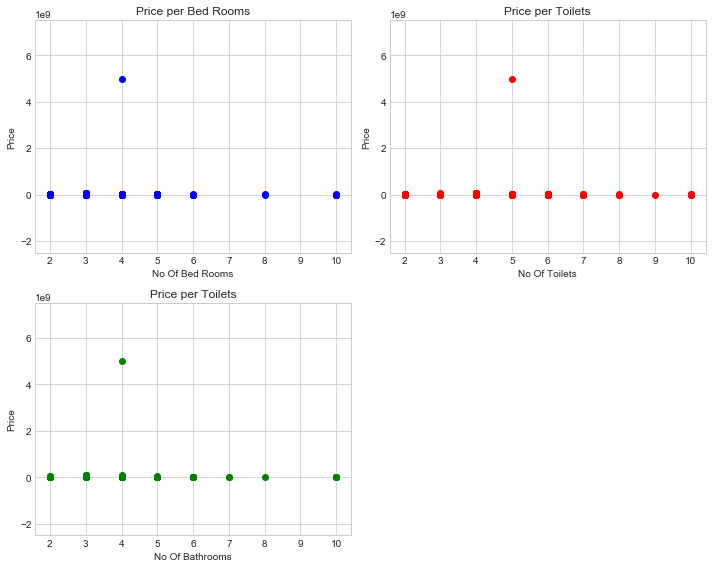

In [13]:
plt.figure(figsize=(10,8))

low = np.min(df['price'])
high = np.max(df['price'])

plt.subplot(2, 2, 1)
plt.scatter(x=df['no_bed'], y=df['price'], color='blue')
plt.title('Price per Bed Rooms')
plt.xlabel('No Of Bed Rooms')
plt.ylabel('Price')
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])

plt.subplot(2, 2, 2)
plt.scatter(df['no_toilets'], df['price'], color='red')
plt.title('Price per Toilets')
plt.xlabel('No Of Toilets')
plt.ylabel('Price')
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])

plt.subplot(2, 2, 3)
plt.scatter(df['no_bath'], df['price'], color='green')
plt.title('Price per Toilets')
plt.xlabel('No Of Bathrooms')
plt.ylabel('Price')
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])

plt.tight_layout()
plt.show()

## Treating Outliers

In [14]:
df['price'] = df['price'].astype('int')
df[df['price'] > 1000000000]

,lat,lng,no_bath,no_bed,no_toilets,price
13662,6.428056,3.421944,4.0,4,5.0,5000000000


In [15]:
df = df[df['price'] < 1000000000]

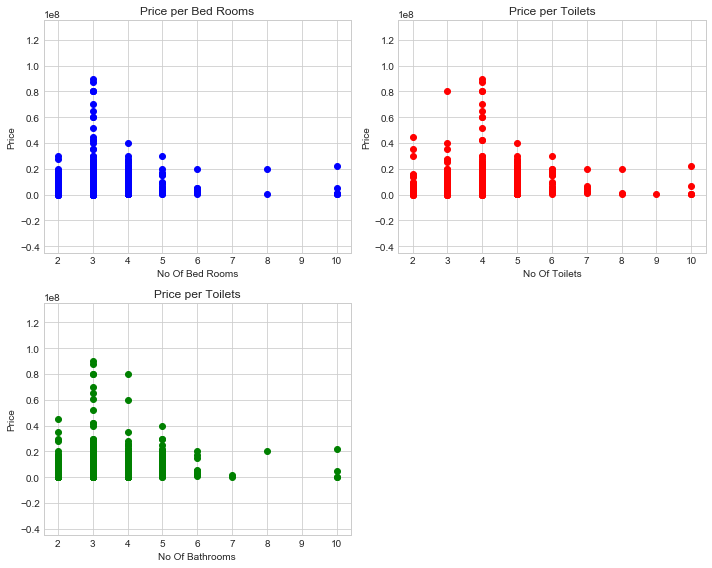

In [16]:
plt.figure(figsize=(10,8))

low = np.min(df['price'])
high = np.max(df['price'])

plt.subplot(2, 2, 1)
plt.scatter(x=df['no_bed'], y=df['price'], color='blue')
plt.title('Price per Bed Rooms')
plt.xlabel('No Of Bed Rooms')
plt.ylabel('Price')
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])

plt.subplot(2, 2, 2)
plt.scatter(df['no_toilets'], df['price'], color='red')
plt.title('Price per Toilets')
plt.xlabel('No Of Toilets')
plt.ylabel('Price')
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])

plt.subplot(2, 2, 3)
plt.scatter(df['no_bath'], df['price'], color='green')
plt.title('Price per Toilets')
plt.xlabel('No Of Bathrooms')
plt.ylabel('Price')
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])

plt.tight_layout()
plt.show()

# Model Development

The accuracy of the model used would be measured using: 
   * **Mean Squared Error**: This is the average of the squares of the errors of all the datapoints in the given dataset.
   * **Explained Variance Score**: This score measures how well our model can account for the variation in our dataset.
   * **R2-score**: This tells us how well the unknown samples will be predicted by our model.

In [17]:
def accuracy(test, pred, log = False):
    acc = {
        'mse': round(sm.mean_squared_error(test, pred), 2),
        'r2_score': round(sm.r2_score(test, pred), 2)
    }
    
    if log is True:
        print("Mean Squared Error: ", acc['mse'])
        print("R2-score: ", acc['r2_score'])
    else:
        return acc

## Spliting data for train and test

In [18]:
price = pd.Series(df['price'], dtype='float32')
feature_final = df.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(feature_final,
                                                    price,
                                                    test_size = 0.2,
                                                    random_state = 1)

In [19]:
print("Training set has {} samples.", X_train.shape)
print("Testing set has {} samples.", y_train.shape)

Training set has {} samples. (4502, 5)
Testing set has {} samples. (4502,)


### Base Model Performance

In [20]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
y_train_pred = linear_regressor.predict(X_train)

In [22]:
accuracy(y_train, y_train_pred, True)

Mean Squared Error:  1.88729872834e+13
R2-score:  0.14


In [23]:
y_test_pred = linear_regressor.predict(X_test)

In [24]:
accuracy(y_test, y_test_pred, True)

Mean Squared Error:  2.00110099893e+13
R2-score:  0.12


### Best Model Performance

In [25]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    results = {}
    start = time()    
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time()
    results['train_time'] = end - start
    
    start = time()
    prediction_test = learner.predict(X_test)
    prediction_train = learner.predict(X_train[:100])
    end = time()
    
    acc_train = accuracy(prediction_train[:100], y_train[:100])
    acc_test = accuracy(prediction_test[:100], y_test[:100])
    
    results['pred_time'] = end - start
    results['r2_score_train'] = acc_train['r2_score']
    results['mse_train'] = acc_train['mse']
    results['r2_score_test'] = acc_test['r2_score']
    results['mse_test'] = acc_test['mse']

    print(learner.__class__.__name__, "trained on", sample_size, "samples.")
    
    return results

In [26]:
samples_100 = len(y_train)
samples_10 = int(math.floor((samples_100 * 10) / 100))
samples_1 = int(math.floor((samples_100 * 1) / 100))

In [66]:
clf_a = linear_model.Ridge()
clf_b = SVR()
clf_c = DecisionTreeRegressor()
clf_d = RandomForestRegressor()
clf_f = BaggingRegressor()

In [67]:
results = {}
for clf in [clf_a, clf_b, clf_c, clf_d, clf_f]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)


Ridge trained on 45 samples.
Ridge trained on 450 samples.
Ridge trained on 4502 samples.
SVR trained on 45 samples.
SVR trained on 450 samples.
SVR trained on 4502 samples.
DecisionTreeRegressor trained on 45 samples.
DecisionTreeRegressor trained on 450 samples.
DecisionTreeRegressor trained on 4502 samples.
RandomForestRegressor trained on 45 samples.
RandomForestRegressor trained on 450 samples.
RandomForestRegressor trained on 4502 samples.
BaggingRegressor trained on 45 samples.
BaggingRegressor trained on 450 samples.
BaggingRegressor trained on 4502 samples.


In [70]:
print("DecisionTreeRegressor_MSE_TEST = ", results['DecisionTreeRegressor'][2]['mse_test'])
print("RandomForestRegressor_MSE_TEST = ",results['RandomForestRegressor'][2]['mse_test'])
print("Ridge_MSE_TEST = ",results['Ridge'][2]['mse_test'])
print("SVR_MSE_TEST = ",results['SVR'][2]['mse_test'])
print("BaggingRegressor_MSE_TEST = ",results['BaggingRegressor'][2]['mse_test'])

DecisionTreeRegressor_MSE_TEST =  1.710320881e+13
RandomForestRegressor_MSE_TEST =  1.76223298595e+13
Ridge_MSE_TEST =  2.0693986312e+13
SVR_MSE_TEST =  2.5695970116e+13
BaggingRegressor_MSE_TEST =  1.87957186731e+13


In [71]:
print("DecisionTreeRegressor_MSE_TRAIN = ", results['DecisionTreeRegressor'][2]['mse_train'])
print("RandomForestRegressor_MSE_TRAIN = ",results['RandomForestRegressor'][2]['mse_train'])
print("Ridge_MSE_TRAIN = ",results['Ridge'][2]['mse_train'])
print("SVR_MSE_TRAIN = ",results['SVR'][2]['mse_train'])
print("BaggingRegressor_MSE_TRAIN = ",results['BaggingRegressor'][2]['mse_train'])

DecisionTreeRegressor_MSE_TRAIN =  2.28960488944e+13
RandomForestRegressor_MSE_TRAIN =  2.24161978297e+13
Ridge_MSE_TRAIN =  3.36323215504e+13
SVR_MSE_TRAIN =  4.13308025807e+13
BaggingRegressor_MSE_TRAIN =  2.25891284268e+13


### Best Parameters For Best Model

In [72]:
def performance_metric(y_true, y_predict):
    return sm.r2_score(y_true, y_predict)

clf = DecisionTreeRegressor()

parameters = { 'max_depth': range(2, 100) } 
scorer = make_scorer(performance_metric)
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_train, y_train)
best_clf = grid_fit.best_estimator_

predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

print("Unoptimized model", accuracy(predictions, y_test))
print("Optimized model", accuracy(best_predictions, y_test))

Unoptimized model {'mse': 17977008573067.352, 'r2_score': -0.41999999999999998}
Optimized model {'mse': 16109824483867.84, 'r2_score': -1.0}


In [91]:
best_clf

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [124]:
clf_main = BaggingRegressor(DecisionTreeRegressor(criterion='mse', max_depth=4, splitter='best'), n_estimators=500, max_samples=1.0, n_jobs=-1, bootstrap=True)

predictions = (clf_main.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

print("Bagged Optimized", accuracy(predictions, y_test))
print("Optimized model", accuracy(best_predictions, y_test))

Bagged Optimized {'mse': 15838527993277.061, 'r2_score': -1.1200000000000001}
Optimized model {'mse': 16109824483867.84, 'r2_score': -1.0}


## Final Model

In [125]:
model = clf_main

In [127]:
df.head(n=15)

,lat,lng,no_bath,no_bed,no_toilets,price
0,6.505798,3.302019,3.0,3,3.0,750000
2,6.505798,3.302019,3.0,2,2.0,450000
3,6.505798,3.302019,2.0,2,2.0,500000
4,6.453094,3.291062,2.0,2,2.0,550000
5,6.505798,3.302019,3.0,3,3.0,800000
7,6.455648,3.441120,3.0,3,4.0,3000000
8,6.451514,3.469745,3.0,3,4.0,3500000
9,6.456271,3.437510,3.0,3,4.0,8500000
10,6.428056,3.421944,3.0,3,4.0,4000000
11,6.454811,3.434691,3.0,3,4.0,6000000


In [128]:
sample = df[0:15].drop('price', axis=1)
sample

,lat,lng,no_bath,no_bed,no_toilets
0,6.505798,3.302019,3.0,3,3.0
2,6.505798,3.302019,3.0,2,2.0
3,6.505798,3.302019,2.0,2,2.0
4,6.453094,3.291062,2.0,2,2.0
5,6.505798,3.302019,3.0,3,3.0
7,6.455648,3.441120,3.0,3,4.0
8,6.451514,3.469745,3.0,3,4.0
9,6.456271,3.437510,3.0,3,4.0
10,6.428056,3.421944,3.0,3,4.0
11,6.454811,3.434691,3.0,3,4.0


In [129]:
sample_predict = model.predict(sample)

In [130]:
sample_predict

array([   613021.85407209,    596107.27730308,    593962.73806012,
          838089.53646219,    613021.85407209,  11072970.34127948,
         5400596.77431647,  11116077.47358945,   9666332.37154479,
        11127004.95648391,   9666332.37154479,   2547290.51667838,
         5400596.77431647,   5400596.77431647,   1001559.41119837])

In [131]:
lekki = pd.DataFrame({ 'lng': [6.4698], 'lat': [3.5852], 'no_bed': [1], 'no_toilets': [1], 'no_bath': [1] })

In [132]:
lekki_predict = model.predict(lekki)

In [133]:
lekki_predict

array([ 1262140.40996042])